<h1>SEM5 CS2<h1>
<h2>18BCS6212<h2>


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#Reaing train.csv file
titanic_train = pd.read_csv(r'C:\Users\lenovo\Downloads\train.csv', encoding = 'ISO-8859-1')

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>Missing Values<h3>

In [7]:
#Finding the % of missing values.
titanic_train.isna().mean().round(4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
#Dropping 'Cabin' as it has >30% missing values.
titanic_train.drop(['Cabin'], axis = 1 ,inplace = True)

In [9]:
#Replacing male with 1 and female with 0 in Sex column.
var = ['Sex']
def binary_map(x):
    return x.map({"male": 1, "female": 0})

titanic_train[var] = titanic_train[var].apply(binary_map)

Removing missing values of embarked, looking at the data we have found that the missing value in Embarked column is in 2 rows which are females.
So we will try to fill the missing value with the majority of females found in Embarked class.


In [10]:
titanic_train.Embarked.value_counts()/len(titanic_train) *100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [11]:
#Creating a df with Sex and Embarked column only.
t1 = titanic_train[['Sex','Embarked']]

In [12]:
#Dropping all the males in the column.
t1.drop(t1[t1['Sex']==1].index, inplace = True)

In [13]:
t1.head()

,Sex,Embarked
1,0,C
2,0,S
3,0,S
8,0,S
9,0,C


In [14]:
#Finding the percentage of females in S, C and Q.
t1.Embarked.value_counts()/len(t1)*100

S    64.649682
C    23.248408
Q    11.464968
Name: Embarked, dtype: float64

In [15]:
#Replacing the missing values in Embarked with highest percentage of females in S,C,Q i.e. with S.
titanic_train['Embarked'].fillna("S", inplace = True)

In [16]:
# % of missing values.
titanic_train.isna().mean().round(4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
dtype: float64

In [17]:
# Rounding off the values in Age column.
titanic_train['Age'] = round(titanic_train['Age'])

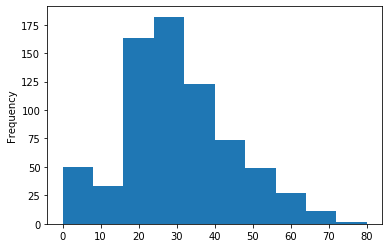

In [18]:
#PLotting a histogram for Age column, we have found that the majority of passengers are in the age group 20-40.
titanic_train['Age'].plot.hist()

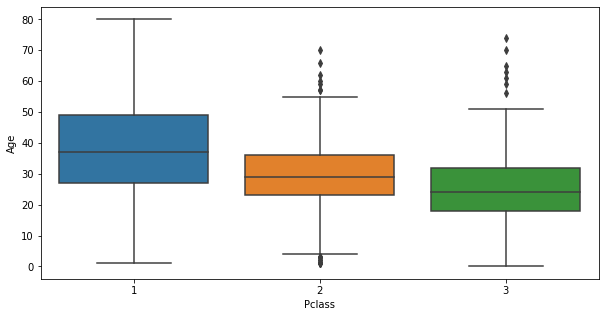

In [19]:
#Boxplot for Age column.
plt.figure(figsize = (10,5))
sns.boxplot( x = 'Pclass', y = 'Age', data = titanic_train)

In [20]:
#Plotting a pivot table for Pclass vs Age which returns the mean of the Age of a particular Pclass.
titanic_train.pivot_table(index = 'Pclass',values = 'Age', aggfunc = 'mean')

,Age
Pclass,
1,38.236559
2,29.872832
3,25.129577


In [21]:
#Filling all Nan values with any number (111 here).
titanic_train['Age'].fillna(value = 111, inplace = True)

In [22]:
#Replacing 111 in the Age column with the mean age (38) where Pclass = 1 and Age = 111.
titanic_train['Age'].mask((titanic_train['Pclass']==1) & (titanic_train['Age']== 111), 38, inplace = True)

In [23]:
#Replacing 111 in the Age column with the mean age (30) where Pclass = 2 and Age = 111.
titanic_train['Age'].mask((titanic_train['Pclass']==2) & (titanic_train['Age']== 111), 30, inplace = True)

In [24]:
#Replacing 111 in the Age column with the mean age (25) where Pclass = 3 and Age = 111.
titanic_train['Age'].mask((titanic_train['Pclass']==3) & (titanic_train['Age']== 111), 25, inplace = True)

In [25]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [26]:
titanic_train.isna().mean().round(4)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [27]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [28]:
#Creating dummy variables for Embarked column.
Embarked1 = pd.get_dummies(titanic_train['Embarked'], drop_first = True)
titanic_train = pd.concat([titanic_train, Embarked1], axis = 1)

In [29]:
titanic_train.drop(['Embarked'], axis = 1, inplace = True)

In [30]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [31]:
#Checking for outliers.
outlier = titanic_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S']]
outlier.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.260382,0.523008,0.381594,32.204208,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.210295,1.102743,0.806057,49.693429,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,0.000000,1.000000
90%,802.000000,1.000000,3.000000,1.000000,47.000000,1.000000,2.000000,77.958300,0.000000,1.000000
95%,846.500000,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,112.079150,1.000000,1.000000
99%,882.100000,1.000000,3.000000,1.000000,65.000000,5.000000,4.000000,249.006220,1.000000,1.000000


We have found that there is no sudden increase in the values of percentiles in all the columns.

In [32]:
#Dropping the object variables i.e. Name and Ticket
titanic_train.drop(['Name', 'Ticket'], axis = 1, inplace = True)

<h3>Scaling<h3>

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
num_vars = titanic_train.columns

In [35]:
titanic_train[num_vars] = scaler.fit_transform(titanic_train[num_vars])
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.000000,0.0,1.0,1.0,0.2750,0.125,0.0,0.014151,0.0,1.0
1,0.001124,1.0,0.0,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0
2,0.002247,1.0,1.0,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0
3,0.003371,1.0,0.0,0.0,0.4375,0.125,0.0,0.103644,0.0,1.0
4,0.004494,0.0,1.0,1.0,0.4375,0.000,0.0,0.015713,0.0,1.0


In [36]:
#Dropping PassengerId as it is of no use and Survived as it is the dependent variable.
X_train = titanic_train.drop(['PassengerId', 'Survived'], axis = 1)

In [37]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1.0,1.0,0.2750,0.125,0.0,0.014151,0.0,1.0
1,0.0,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0
2,1.0,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0
3,0.0,0.0,0.4375,0.125,0.0,0.103644,0.0,1.0
4,1.0,1.0,0.4375,0.000,0.0,0.015713,0.0,1.0


In [38]:
y_train = titanic_train['Survived']

In [39]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

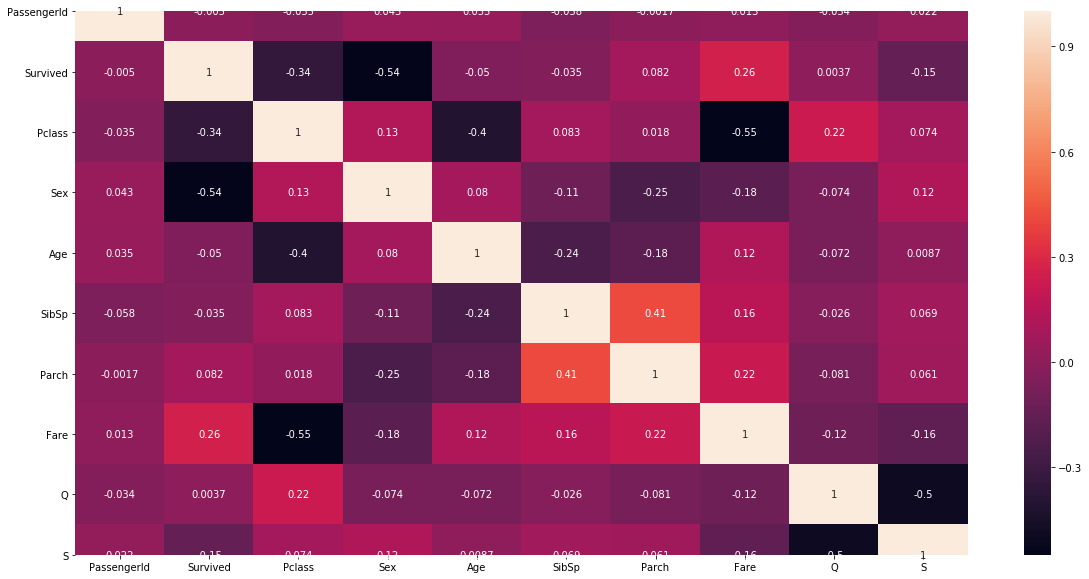

In [40]:
#Plotting heat map for the correlations.
%matplotlib inline
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(titanic_train.corr(),annot = True)
plt.show()

<h2>MODEL<h2>

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
#Using RFE for feature selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5) 
rfe = rfe.fit(X_train, y_train)

In [43]:
#Viewing the list of columns with their support and ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', False, 2),
 ('Fare', True, 1),
 ('Q', False, 4),
 ('S', False, 3)]

In [44]:
#Considering the columns which have RFE ranking as 1
col = X_train.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [45]:
X_train_rfe = X_train[col]

In [46]:
#Adding constant.
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_rfe) 

In [47]:
log = sm.GLM(y_train, X_train_new, family = sm.families.Binomial()).fit()
print(log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.95
Date:                Wed, 26 Aug 2020   Deviance:                       785.91
Time:                        13:11:26   Pearson chi2:                     934.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0823      0.442      9.244      0.0

Dropping columns with p-value>0.05

In [48]:
X_train_new = X_train_new.drop(['Fare'], axis = 1)

In [49]:
X_train_new1 = sm.add_constant(X_train_new)

In [50]:
log = sm.GLM(y_train, X_train_new1, family = sm.families.Binomial()).fit()
print(log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.44
Date:                Wed, 26 Aug 2020   Deviance:                       786.88
Time:                        13:11:27   Pearson chi2:                     933.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2465      0.409     10.390      0.0

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.03
3,Age,1.28
1,Pclass,1.24
4,SibSp,1.07
2,Sex,1.05


In [52]:
#Predicting using the model i.e log
y_train_pred = log.predict(X_train_new1)
y_train_pred[:10]

0    0.086833
1    0.900233
2    0.641952
3    0.911493
4    0.072207
5    0.107871
6    0.294575
7    0.098267
8    0.631763
9    0.880659
dtype: float64

In [53]:
#Re-shaping to put the values in an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08683252, 0.9002335 , 0.64195167, 0.91149285, 0.07220715,
       0.10787108, 0.29457503, 0.09826676, 0.63176251, 0.88065882])

In [54]:
#Creating a dataframe with Survived and Survived_prob.
y_train_pred_final = pd.DataFrame({'Survived': y_train.values, 'Survived_prob': y_train_pred})


In [55]:
y_train_pred_final['Predicted'] = y_train_pred_final.Survived_prob.map(lambda x: 1 if x>0.5 else 0)

In [56]:
y_train_pred_final.head()

,Survived,Survived_prob,Predicted
0,0.0,0.086833,0
1,1.0,0.900233,1
2,1.0,0.641952,1
3,1.0,0.911493,1
4,0.0,0.072207,0


In [57]:
#Creating confusion matrix for Survived and Predicted.
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Predicted)

In [58]:
print(confusion)

[[478  71]
 [101 241]]


In [59]:
#Calculating Accuracy.
Accuracy = metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Predicted)
print(Accuracy)

0.8069584736251403


In [60]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [61]:
#RECALL
Sensitivity = TP/ float(TP+FN)
Sensitivity

0.7046783625730995

In [62]:
Specificity = TN / float(TN+FP)
Specificity

0.8706739526411658

In [63]:
False_positive_rate = FP / float(TN+FP)
False_positive_rate

0.12932604735883424

In [64]:
#PRECISION
#positive predicted value
print(TP / float(TP+FP))

0.7724358974358975


In [65]:
#negative predicted value
print(TN / float(TN+FN))

0.8255613126079447


In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Survived, y_train_pred_final.Predicted, 0.5)

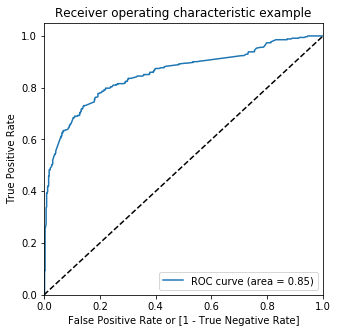

In [68]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

In [69]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.086833,0,1,0,0,0,0,0,0,0,0,0
1,1.0,0.900233,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.641952,1,1,1,1,1,1,1,1,0,0,0
3,1.0,0.911493,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.072207,0,1,0,0,0,0,0,0,0,0,0


In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sensi','Speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)


     Prob  Accuracy     Sensi     Speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.523008  0.929825  0.269581
0.2   0.2  0.712682  0.850877  0.626594
0.3   0.3  0.766554  0.815789  0.735883
0.4   0.4  0.793490  0.777778  0.803279
0.5   0.5  0.806958  0.704678  0.870674
0.6   0.6  0.809203  0.640351  0.914390
0.7   0.7  0.791246  0.502924  0.970856
0.8   0.8  0.763187  0.403509  0.987250
0.9   0.9  0.696970  0.216374  0.996357


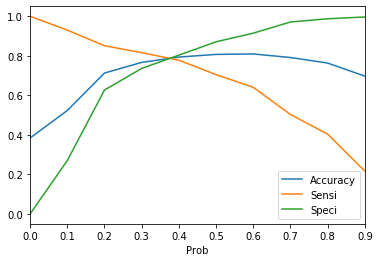

In [71]:
cutoff_df.plot.line(x = 'Prob', y = ['Accuracy', 'Sensi', 'Speci'])
plt.show()

<h4>Here the cutoff is the intersection of these 3 lines i.e. 0.38<h4>

In [72]:
y_train_pred_final['Final_pred'] = y_train_pred_final.Survived_prob.map(lambda x: 1 if x>0.38 else 0)
y_train_pred_final.head()

,Survived,Survived_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_pred
0,0.0,0.086833,0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,0.900233,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.641952,1,1,1,1,1,1,1,1,0,0,0,1
3,1.0,0.911493,1,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.072207,0,1,0,0,0,0,0,0,0,0,0,0


In [73]:
Accuracy = metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Final_pred)
print(Accuracy)

0.7867564534231201


In [74]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Final_pred)

In [75]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [76]:
Sensitivity = TP/ float(TP+FN)
Sensitivity

0.7865497076023392

In [77]:
Specificity = TN / float(TN+FP)
Specificity

0.7868852459016393

In [78]:
False_positive_rate = FP / float(TN+FP)
False_positive_rate

0.21311475409836064

In [79]:
#positive predicted value
print(TP / float(TP+FP))

0.6968911917098446


In [80]:
#negative predicted value
print(TN / float(TN+FN))

0.8554455445544554


In [81]:
from sklearn.metrics import precision_recall_curve

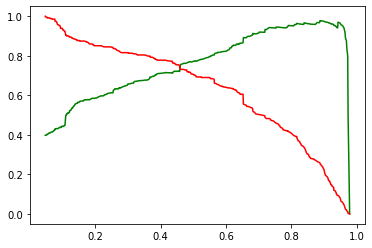

In [82]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


<h4>The lines are intersecting at 0.45<h4>

<h2>TEST<h2>

In [83]:
#Importing test.csv
titanic_t1 = pd.read_csv(r'C:\Users\lenovo\Downloads\test.csv', encoding = 'ISO-8859-1')

In [84]:
#Importing gender_submission.csv
titanic_t2 = pd.read_csv(r'C:\Users\lenovo\Downloads\gender_submission.csv', encoding = 'ISO-8859-1')

In [85]:
#Merging test.csv and gender_submission.csv on PassengerId
titanic_test = pd.merge(titanic_t1, titanic_t2, how='inner', on='PassengerId')

In [86]:
#Looking for % of missing values.
titanic_test.isna().mean().round(4)*100

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
Survived        0.00
dtype: float64

In [87]:
#Drop columns with missing values more than 30%.
titanic_test.drop(['Cabin'], axis = 1 ,inplace = True)

In [88]:
#Converting male -> 1 and female -> 0
var = ['Sex']
def binary_map(x):
    return x.map({"male": 1, "female": 0})

titanic_test[var] = titanic_test[var].apply(binary_map)

In [89]:
titanic_test['Age'] = round(titanic_test['Age'])

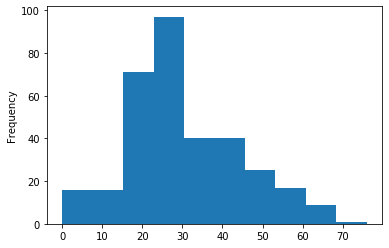

In [90]:
titanic_test['Age'].plot.hist()

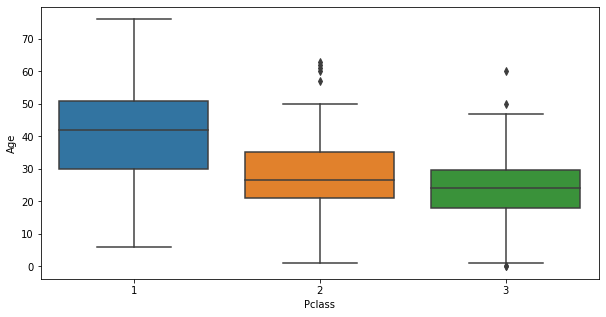

In [91]:
plt.figure(figsize = (10,5))
sns.boxplot( x = 'Pclass', y = 'Age', data = titanic_test)

<h4>Making a pivot table for Pclass and Age returning the mean of Age of particular Pclass.   We will replace the values of Age with the mean Age with respect to the Pclass.<h4>

In [92]:
titanic_test.pivot_table(index = 'Pclass',values = 'Age', aggfunc = 'mean')

,Age
Pclass,
1,40.908163
2,28.772727
3,23.993151


In [93]:
titanic_test['Age'].fillna(value = 111, inplace = True)

In [94]:
titanic_test['Age'].mask((titanic_test['Pclass']==1) & (titanic_test['Age']== 111), 41, inplace = True)

In [95]:
titanic_test['Age'].mask((titanic_test['Pclass']==2) & (titanic_test['Age']== 111), 29, inplace = True)

In [96]:
titanic_test['Age'].mask((titanic_test['Pclass']==3) & (titanic_test['Age']== 111), 24, inplace = True)

In [97]:
titanic_test.fillna(titanic_test.mean(), inplace = True)

In [98]:
titanic_test.isna().mean().round(4)*100

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [99]:
Embarked1 = pd.get_dummies(titanic_test['Embarked'], drop_first = True)
titanic_test = pd.concat([titanic_test, Embarked1], axis = 1)

In [100]:
titanic_test.drop(['Embarked'], axis = 1, inplace = True)

In [101]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,Q,S
0,892,3,"Kelly, Mr. James",1,34.0,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1,0,1


In [102]:
outlier = titanic_test[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S']]
outlier.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.636364,29.392344,0.447368,0.392344,35.627188,0.110048,0.645933
std,120.810458,0.481622,0.841838,0.481622,12.966074,0.896760,0.981429,55.840500,0.313324,0.478803
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1204.750000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.500000,0.000000,1.000000
90%,1267.300000,1.000000,3.000000,1.000000,48.000000,1.000000,1.300000,79.200000,1.000000,1.000000
95%,1288.150000,1.000000,3.000000,1.000000,55.000000,2.000000,2.000000,151.550000,1.000000,1.000000
99%,1304.830000,1.000000,3.000000,1.000000,63.830000,4.000000,4.000000,262.375000,1.000000,1.000000


In [103]:
titanic_test.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [104]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [105]:
num_var = titanic_test.columns

In [106]:
titanic_test[num_var] = scaler.fit_transform(titanic_test[num_var])
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Q,S
0,0.000000,1.0,1.0,0.447368,0.000,0.000000,0.015282,0.0,1.0,0.0
1,0.002398,1.0,0.0,0.618421,0.125,0.000000,0.013663,1.0,0.0,1.0
2,0.004796,0.5,1.0,0.815789,0.000,0.000000,0.018909,0.0,1.0,0.0
3,0.007194,1.0,1.0,0.355263,0.000,0.000000,0.016908,0.0,0.0,1.0
4,0.009592,1.0,0.0,0.289474,0.125,0.111111,0.023984,1.0,0.0,1.0


In [107]:
#Put all those columns which are used in the final traning model.
X_test = titanic_test[['Age', 'Pclass', 'SibSp', 'Sex']]

In [108]:
y_test = titanic_test['Survived']

In [109]:
X_test_new = sm.add_constant(X_test)

In [110]:
#Using the final model log for prediction.
y_test_pred = log.predict(X_test_new)

In [111]:
y_test_pred[:10]

0    0.069159
1    0.379589
2    0.103702
3    0.085658
4    0.583391
5    0.125947
6    0.625356
7    0.197020
8    0.712956
9    0.045204
dtype: float64

In [112]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.069159
1,0.379589
2,0.103702
3,0.085658
4,0.583391


In [113]:
y_test_1 = pd.DataFrame(y_test)

In [114]:
y_test_1['PassengerId']  = y_test_1.index

In [115]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_1.reset_index(drop=True, inplace=True)

In [116]:
y_pred_final = pd.concat([y_test_1, y_pred_1],axis=1)

y_pred_final.head()

,Survived,PassengerId,0
0,0.0,0,0.069159
1,1.0,1,0.379589
2,0.0,2,0.103702
3,0.0,3,0.085658
4,1.0,4,0.583391


In [117]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_prob'})

In [118]:
y_pred_final = y_pred_final[['PassengerId', 'Survived', 'Survived_prob']]

In [119]:
y_pred_final.head()

,PassengerId,Survived,Survived_prob
0,0,0.0,0.069159
1,1,1.0,0.379589
2,2,0.0,0.103702
3,3,0.0,0.085658
4,4,1.0,0.583391


In [120]:
y_pred_final['Predicted'] = y_pred_final.Survived_prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final.head()

,PassengerId,Survived,Survived_prob,Predicted
0,0,0.0,0.069159,0
1,1,1.0,0.379589,0
2,2,0.0,0.103702,0
3,3,0.0,0.085658,0
4,4,1.0,0.583391,1


<h4>ACCURACY<h4>

In [121]:
Accuracy = metrics.accuracy_score(y_pred_final.Survived, y_pred_final.Predicted)
print(Accuracy)

0.916267942583732


In [122]:
confusion3 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.Predicted)

In [123]:
print(confusion3)

[[236  30]
 [  5 147]]


In [124]:
TP = confusion3[1,1]
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

<h4>Sensitivity<h4>

In [125]:
Sensitivity = TP / float(TP + FN)
Sensitivity

0.9671052631578947

<h4>Specificity<h4>

In [126]:
Specificity = TN / float(TN + FP)
Specificity

0.8872180451127819

<h3>Kaggle work<h3>

In [127]:
titanic_t2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [128]:
titanic_t1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
df = pd.DataFrame(titanic_t1['PassengerId'])

In [130]:
df['Survived'] = y_pred_final.Predicted

In [131]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [132]:
df.to_csv('KaggleSubmission.csv')